<a href="https://colab.research.google.com/github/ahxlzjt/Bio-data-text-mining/blob/main/2070068_%EC%A0%84%EC%97%B0%EC%A3%BC_%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ■ 네이버 뉴스 사이트에서 (1) 페이지 수 & (2) 기간을 지정하여 뉴스 데이터를 수집




In [ ]:
# (1) 나눔폰트 설치 하기  =====================================
# sudo : 운영자 권한으로 명령어를 실행하라는 의미
# apt-get (Advanced Packaging Tool) : 패키지 관리 tool


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#@title ■ 한글 폰트를 설치한 후 반드시 런타임을 다시 시작
### (주의!!!) 런타임 초기화가 아님 !!!
#
#
# (2) 런타임 다시 시작  : Ctrl + M .
#
#

In [ ]:
# (3) 나눔폰트 설치 확인 하기  ==================================

import  matplotlib
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt


sys_font  = fm.findSystemFonts ( )

[ font  for  font  in  sys_font  if  "Nanum"  in font ]


['/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/Nan

In [ ]:
# (4) 나눔폰트 설정 하기  ==================================
#
#
# font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

print("◎ 폰트 이름 : ",font_name)

plt.rc("font", family= font_name)       # Nanum 폰트 세팅



◎ 폰트 이름 :  NanumGothic


In [ ]:

!pip install konlpy --quiet


In [ ]:
# gensim version 확인

!pip show gensim


Name: gensim
Version: 4.3.1
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy, smart-open
Required-by: pyLDAvis


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
file_path = "/content/gdrive/My Drive/Colab Notebooks/TXTData/"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import seaborn as sns

from bs4 import BeautifulSoup
from konlpy.tag import Okt
from wordcloud  import WordCloud

import time
import datetime

# sklearn 패키지

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim import corpora

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# startswith : 문자열이 특정문자로 시작하는지 여부를 알려줌 (true나 false 를 반환)

test_string = 'Hello World, Python!'

if test_string.startswith('Hello'):
  print('◎ 첫문자열이 Hello 단어로 시작합니다.....')
  print()


# endswith : 문자열이 특정문자로 끝나는지 여부를 알려줌 (true나 false 를 반환)

if test_string.endswith('Python!'):
  print('◎ 마지막 문자열이 Python! 단어입니다.....')
  print()


◎ 첫문자열이 Hello 단어로 시작합니다.....

◎ 마지막 문자열이 Python! 단어입니다.....



In [ ]:
# select 문에서 tag와 class name, id 를 모두 특정하는 경우 (예시) : soup.select_one('div.article_view#mArticle')

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}


def NAVER_news_scraper(maxpage, query, s_date, e_date):

    s_from = s_date.replace(".", "")
    e_to = e_date.replace(".", "")

    news_df = pd.DataFrame(columns=("Title", "Datetime", "Article", "Link"))
    index = 0

    page = 1
    maxpage_t =(int(maxpage)-1)*10+1

    page_number = 1

    while page <= maxpage_t:

        #  경제면에서만 검색어를 찾고자 할때 : 아래 url 에서 '&sid1=101&' 를 추가함
        url = 'https://search.naver.com/search.naver?where=news&query={0}&ds={1}&de={2}&nso=so:r,p:from{3}to{4},a:all&start='.format\
               (query, s_date, e_date, s_from, e_to)  + str(page)

        print('▶ 수집 중인 페이지 = ', page_number)
        req = requests.get(url)

        cont = req.content
        soup = BeautifulSoup(cont, 'html.parser')

        for urls in soup.select("a.info"):

            try:
                if urls["href"].startswith("https://n.news.naver.com"):     # startswith : 문자열이 특정문자로 시작하는지 여부를 알려줌 (true나 false 를 반환)

                        print('👉 url = ', urls["href"])
                        newsreq = requests.get(urls["href"], headers = headers)

                        bsoup = BeautifulSoup(newsreq.content, 'html.parser')

                        title = bsoup.select('h2.media_end_head_headline')[0].text
                        print('💙 뉴스 제목 = ', title)

                        newsdate = bsoup.select('span.media_end_head_info_datestamp_time._ARTICLE_DATE_TIME')[0].text[:10]  # get_text()[:10] 사용 가능
                        print('💜 뉴스 날짜 = ', newsdate)

                        btext = bsoup.select('div#dic_area')[0].text.replace('\n', " ").replace('\t', " ")   # text 대신 get_text() 사용 가능
                        article = btext.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
                        print('📌 기사 본문 = ', article)

                        newscompany = bsoup.select('em.media_end_linked_more_point')[0].text     # text 대신 get_text() 사용 가능
                        print("💛 뉴스 제공사 = ", newscompany)
                        print()

                        news_df.loc[index] = [title, newsdate, article, newscompany]
                        index += 1


            except Exception as e:
                continue
        page += 10
        page_number +=1

    print()
    print('Completed! 🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞🌞 ')

    return news_df




In [ ]:
# 관심 키워드 및 페이지수 입력 ===========================================================
#
# 경제는 101, 사회는 102, 생활/문화는 103, 세계는 104, IT/과학은 105로 분류되어 있음


query = input("🔴 검색어: ")

maxpage = input("🔴 검색 할 페이지수: ")    # 종료 날짜부터 시작하여 데이터 추출 시작 - 검색 페이지 수에 의해 제한될 수 있음

s_date = input("🟢 시작 날짜(YYYY.MM.DD): ")      # 예시 : 2023.01.01

e_date = input("🟢 종료 날짜(YYYY.MM.DD): ")      # 예시 : 2023.01.10
print()

start = time.time()    # 시작 시간 기록


news_df = NAVER_news_scraper(maxpage, query, s_date, e_date)


processing_time = time.time() - start    # 경과 시간 계산
times = str(datetime.timedelta(seconds = processing_time))

print()
print("◎ 수행시간 = ", times)



🔴 검색어: 바이오데이터
🔴 검색 할 페이지수: 20
🟢 시작 날짜(YYYY.MM.DD): 2022.01.01
🟢 종료 날짜(YYYY.MM.DD): 2023.05.05

▶ 수집 중인 페이지 =  1
👉 url =  https://n.news.naver.com/mnews/article/366/0000899135?sid=101
💙 뉴스 제목 =  셀트리온, 16만명 한국인 유전체 정보 보유한 바스젠바이오와 바이오마커 공동 개발
💜 뉴스 날짜 =  2023.05.04
📌 기사 본문 =   유전체 바이오마커 개발 목표...5년간 10건 공동 R&D 추진  셀트리온, 바스젠바이오에 지분 투자도    4일 인천 송도 셀트리온 1공장에서 개최된 셀트리온-바스젠바이오 공동연구 및 투자 협약식에서 (왼쪽부터) 장일태 바스젠바이오 대표, 기우성 셀트리온 대표이사, 김호 바스젠바이오 대표가 참석해 협약서를 교환하고 기념촬영을 하고 있다. / 셀트리온 제공        셀트리온이 빅데이터 활용 역량을 키우기 위해 바이오 빅데이터 전문기업과 공동 연구에 나선다.셀트리온은 4일 인공지능(AI) 기반 바이오 빅데이터 기업 바스젠바이오와 공동 연구 계약을 체결했다고 밝혔다. 두 회사는 앞으로 공동연구위원회를 구성하고 유전체 분석 역량 확보와 바이오마커 개발을 목표로 향후 5년간 10건의 공동 연구를 추진하기로 했다.바이오마커는 단백질이나 디옥시리보핵산(DNA), 리보핵산(RNA), 대사 물질을 이용해 몸 안의 변화를 알아내는 지표다. 질환을 진단하고 약물의 치료 반응을 객관적으로 측정하는 지표로 활용할 수 있다는 평가를 받고 있다. 최근 정밀 의료에 대한 수요가 늘면서 바이오마커에 대한 시장의 관심도 커지고 있다. 글로벌 대형 제약사들도 바이오마커 기술 확보에 적극 나서고 있다.셀트리온은 이번 계약으로 의약품 개발뿐 아니라 바이오 빅데이터 분석까지 연구개발(R&D) 영역을 확장하게 됐다. 앞으로 유전체 바이오마커를 개발해 의약품에 잘 맞는 환자군을 찾아내고 효과적 치료를 위한 질환의 표

In [ ]:

news_df.shape



(123, 4)

In [ ]:

news_df.head(20)


,Title,Datetime,Article,Link
0,"셀트리온, 16만명 한국인 유전체 정보 보유한 바스젠바이오와 바이오마커 공동 개발",2023.05.04,"유전체 바이오마커 개발 목표...5년간 10건 공동 R&D 추진 셀트리온, 바스...",조선비즈
1,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""",2023.05.04,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""[셀트리온 제공. 재...",연합뉴스
2,"""제약·바이오 새시대 온다""…19일 'AI신약개발' 혁신포럼",2023.05.04,기사내용 요약제약바이오협회·복지부·진흥원 주최 [서울=뉴시스] (사진=한국제...,뉴시스
3,"[한국마사회 소식] 마사회, '공공데이터 제공' 4년 연속 우수기관",2023.05.04,□공공데이터 활용 지원 실적 등 2개 분야 최고점수 획득 한국마사회가 행정안전부 ...,프레시안
4,"이만열 순천향의생명연구원 교수, '바이오·의료기술개발사업' 선정",2023.05.04,'줄기세포 아틀라스 기반 난치성 질환 치료기술개발 사업' 추진...5년간 국비 4...,머니투데이
5,"인성정보, 총 1조 규모 美 헬스케어 사업 수주에 상한가 직행[Why 바이오]",2023.05.04,재향군인회에 의료기기 제공2차 시범사업 총 규모는 1조4개 기업 중 하나로 인성정...,서울경제
6,"MIT 간 尹 “바이오-디지털 결합, 인류 삶 바꿔”",2023.04.29,의료-AI 접목 지원 방안 내달 발표방미 MOU 50건 중 23건이 바이오 ...,동아일보
7,"尹, MIT 디지털바이오 석학들과 대담…한국 대통령 최초 방문",2023.04.29,"""백신 개발은 디지털바이오의 힘…의사과학자 양성 필요성"" 보스턴 도착한 윤석...",연합뉴스
8,"라덕연, CJ그룹 회장 동생과 바이오 상장사도 손댔다",2023.05.02,2020년 9월 어센트바이오펀드 최대주주로 투자이후 이재환 대표로 대주주 바꾸고 ...,서울경제
9,"엔젠바이오, 유아 성장 맞춤형 솔루션 특허 등록",2023.05.03,"기사내용 요약""장내 마이크로바이옴서 성장 부진·비만 해답 찾아"" [서울=뉴시...",뉴시스


In [ ]:

news_df.tail(20)


,Title,Datetime,Article,Link
103,"[데이터로 보는 증시]셀트리온헬스케어·바이오니아, 기관·외국인 코스닥 순매수 1위(...",2023.05.04,"에코프로, 개인 순매수 1위[서울경제] 4일 코스닥지수는 전일보다 1.88포인트(...",서울경제
104,"[데이터로 보는 증시]셀트리온헬스케어·바이오니아, 기관·외국인 코스닥 순매수 1위(...",2023.05.04,"에코프로, 개인 순매수 1위[서울경제] 4일 코스닥지수는 전일보다 1.88포인트(...",서울경제
105,"엔젠바이오, 장내 마이크로바이옴에서 영유아 성장 부진 및 비만 해답 찾아",2023.05.03,NGS(차세대 염기서열 분석) 정밀진단 플랫폼 전문기업 엔젠바이오(대표이사 ...,아시아경제
106,"산업부, 바이오경제 미래전략 포럼 개최…""글로벌 주도권 선점해야""",2023.04.26,상반기 중 범정부 '바이오경제 2.0전략' 발표 계획 삼성바이오로직스 샌프란...,서울경제
107,"삼성바이오로직스, 1분기 영업익 1917억 역대 최대....매출도 41%↑",2023.04.24,"매출 7209억원, 영업익 1917억원…증권가 전망치 부합“CMO 성장세 지속…원...",조선비즈
108,'바이오 클러스터' 보스턴 찾은 美 경제사절단…무슨 성과 냈을까,2023.04.28,"대웅, 자가면역질환 신약 기술수출 성과선급금 148억…최대 6400억 규모카카오헬...",아시아경제
109,"K-바이오, 美 보스턴서 6700억 금맥 캤다",2023.04.28,한미 디지털·바이오헬스 비즈니스 포럼 개최20개사 대상 미국 진출 지원사업 성과대...,데일리안
110,국가 바이오 데이터 스테이션 활용 경진대회 개최,2023.04.24,과학기술정보통신부 로고 DNA 이중나선구조 발견 70주...,조선비즈
111,"[KISTI과학향기]AI 넘어설 수 있을까, 뇌세포로 만드는 바이오컴퓨팅",2023.05.01,현제 전 세계 1위 슈퍼컴퓨터인 미국 오크리지국립연구소의 프론티어. 프론티...,전자신문
112,"시지바이오, 미국 법인 설립…재생의료 시장 확대",2023.04.25,100% 출자해 메릴랜드주에 '시지메디텍' 설립시지바이오가 미국 현지법인 '시지메...,아이뉴스24


In [ ]:
# 수집한 첫번째 기사 내용 확인하기

news_df['Article'][0]


' 유전체 바이오마커 개발 목표...5년간 10건 공동 R&D 추진  셀트리온, 바스젠바이오에 지분 투자도    4일 인천 송도 셀트리온 1공장에서 개최된 셀트리온-바스젠바이오 공동연구 및 투자 협약식에서 (왼쪽부터) 장일태 바스젠바이오 대표, 기우성 셀트리온 대표이사, 김호 바스젠바이오 대표가 참석해 협약서를 교환하고 기념촬영을 하고 있다. / 셀트리온 제공        셀트리온이 빅데이터 활용 역량을 키우기 위해 바이오 빅데이터 전문기업과 공동 연구에 나선다.셀트리온은 4일 인공지능(AI) 기반 바이오 빅데이터 기업 바스젠바이오와 공동 연구 계약을 체결했다고 밝혔다. 두 회사는 앞으로 공동연구위원회를 구성하고 유전체 분석 역량 확보와 바이오마커 개발을 목표로 향후 5년간 10건의 공동 연구를 추진하기로 했다.바이오마커는 단백질이나 디옥시리보핵산(DNA), 리보핵산(RNA), 대사 물질을 이용해 몸 안의 변화를 알아내는 지표다. 질환을 진단하고 약물의 치료 반응을 객관적으로 측정하는 지표로 활용할 수 있다는 평가를 받고 있다. 최근 정밀 의료에 대한 수요가 늘면서 바이오마커에 대한 시장의 관심도 커지고 있다. 글로벌 대형 제약사들도 바이오마커 기술 확보에 적극 나서고 있다.셀트리온은 이번 계약으로 의약품 개발뿐 아니라 바이오 빅데이터 분석까지 연구개발(R&D) 영역을 확장하게 됐다. 앞으로 유전체 바이오마커를 개발해 의약품에 잘 맞는 환자군을 찾아내고 효과적 치료를 위한 질환의 표적 발굴하는 것을 목표로 내놨다. 또 후보물질 탐색은 물론 임상 디자인에도 관련 기술을 접목한다는 계획이다.2018년 설립된 바스젠바이오는 바이오마커 발굴과 AI 신약개발에 주력하고 있다. 시간에 따른 질병 위험도 변화를 예측·진단하기 위한 자체 바이오마커(TLBM) 기술과 컴퓨터 시뮬레이션으로 약물 효과를 예측하는 AI 신약개발 플랫폼 딥시티(DEEPCT)를 보유하고 있다.바스젠바이오는 17년 이상 추적 관찰된 약 16만명의 한국인 유전체 코호트 데이터를 독점적으로 확보하고 있다.

In [ ]:
# 수집한 마지막 기사 내용 확인하기

news_df['Article'].iloc[-1]


' 홍순재 바이오북 대표기업 핵심기술·인력·가치 등 담아해외투자자 매칭 돕는 \'마이닝큐\'기업엔 IR소통법·재무·홍보 자문설립때부터 세계시장 노려야 성공     "K바이오업체들이 글로벌 자금을 유치하기 위해서는 한국 생명과학 산업지도가 필요하다." 홍순재 바이오북 대표(사진)는 1일 파이낸셜뉴스와 만나 이같이 강조했다.   바이오북은 2021년 설립된 생명과학전문 정보 플랫폼 스타트업이다. 해외 투자자와 국내 바이오 헬스케어기업을 연결해 주는 투자자 매칭 서비스와 기업의 커뮤니케이션 전략을 컨설팅하는 사업이 주력이다.   홍 대표는 "우리가 모르는 길을 찾아갈 때 내비게이션이 필요한 것처럼 한국 바이오 헬스케어라는 생소한 시장에 발을 들여놓으려는 해외 투자자들이 맥을 짚을 수 있게 도와주는 산업지도 서비스가 바이오북의 \'마이닝큐(Mining Q)\'"라고 소개했다.   마이닝큐는 항암, 디지털 치료, 희귀병, 건강기능식품 등 분류체계별 주요 기업의 핵심기술, 시장특징 및 사이즈, 핵심인력 프로파일, 유사기업가치 등 투자검토 단계에서 기본적으로 필요한 정보를 디지털로 구현한 자료를 말한다. 현재까지 600여개 기업의 기초자료를 확보했고, 내년까지 2000여개 기업정보 수집을 목표로 하고 있다.   마이닝큐가 투자자를 위한 정보 서비스인 반면 생명과학 기업들을 위해서는 커뮤니케이션 전략 컨설팅 서비스를 제공한다.   홍 대표는 "다양한 인간 관계 속에서 갈등의 원인은 서로에 대한 이해 부족 그리고 소통 부족에서 비롯된다"며 "기술의 전문성이 높아 이해하기 어려운 바이오기업으로서는 자신들의 기술과 잠재력을 쉽고 명료하게 정리하고 전달하는 능력이 매우 중요하다"고 강조했다.   특히 투자유치, 라이선싱아웃, 인수합병(M&A), 기업공개 등 주요 이벤트가 예상될 경우 이를 감안한 전략적 커뮤니케이션 계획이 수립돼야 한다.   바이오북은 재무자문과 홍보 업무를 하나로 묶은 복합상품\' 커뮤니케이션 전략자문(CSA)\' 서비스를 제공한다. 홍 대표는 "많은 분야에서 융

In [ ]:
# 수집한 데이터를 화일로 저장

d_from = s_date.replace(".", "")
d_to = e_date.replace(".", "")

file_path =  "/content/gdrive/My Drive/Colab Notebooks/TXTData/"

file_name = "네이버_뉴스_" + query + "_" + d_from + "_" + d_to + ".csv"

file_full_path = file_path + file_name

news_df.to_csv(file_full_path, index = False, encoding="utf-8-sig")



In [ ]:
# 저장된 데이터 화일을 읽어 오기  (내용 확인 하기)

report = pd.read_csv(file_full_path)

report.shape


(123, 4)

In [ ]:

report.head(10)


,Title,Datetime,Article,Link
0,"셀트리온, 16만명 한국인 유전체 정보 보유한 바스젠바이오와 바이오마커 공동 개발",2023.05.04,"유전체 바이오마커 개발 목표...5년간 10건 공동 R&D 추진 셀트리온, 바스...",조선비즈
1,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""",2023.05.04,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""[셀트리온 제공. 재...",연합뉴스
2,"""제약·바이오 새시대 온다""…19일 'AI신약개발' 혁신포럼",2023.05.04,기사내용 요약제약바이오협회·복지부·진흥원 주최 [서울=뉴시스] (사진=한국제...,뉴시스
3,"[한국마사회 소식] 마사회, '공공데이터 제공' 4년 연속 우수기관",2023.05.04,□공공데이터 활용 지원 실적 등 2개 분야 최고점수 획득 한국마사회가 행정안전부 ...,프레시안
4,"이만열 순천향의생명연구원 교수, '바이오·의료기술개발사업' 선정",2023.05.04,'줄기세포 아틀라스 기반 난치성 질환 치료기술개발 사업' 추진...5년간 국비 4...,머니투데이
5,"인성정보, 총 1조 규모 美 헬스케어 사업 수주에 상한가 직행[Why 바이오]",2023.05.04,재향군인회에 의료기기 제공2차 시범사업 총 규모는 1조4개 기업 중 하나로 인성정...,서울경제
6,"MIT 간 尹 “바이오-디지털 결합, 인류 삶 바꿔”",2023.04.29,의료-AI 접목 지원 방안 내달 발표방미 MOU 50건 중 23건이 바이오 ...,동아일보
7,"尹, MIT 디지털바이오 석학들과 대담…한국 대통령 최초 방문",2023.04.29,"""백신 개발은 디지털바이오의 힘…의사과학자 양성 필요성"" 보스턴 도착한 윤석...",연합뉴스
8,"라덕연, CJ그룹 회장 동생과 바이오 상장사도 손댔다",2023.05.02,2020년 9월 어센트바이오펀드 최대주주로 투자이후 이재환 대표로 대주주 바꾸고 ...,서울경제
9,"엔젠바이오, 유아 성장 맞춤형 솔루션 특허 등록",2023.05.03,"기사내용 요약""장내 마이크로바이옴서 성장 부진·비만 해답 찾아"" [서울=뉴시...",뉴시스


In [ ]:

report.tail(10)


,Title,Datetime,Article,Link
113,백신·바이오에 2.4조 투입…미래투자 5배 확대한 SK바사,2023.04.28,SK바이오사이언스의 백신 공장 안동 L하우스SK바이오사이언스가 백신·바이오...,머니투데이
114,"""백신개발 10년→1년내 단축""…AI·빅데이터로 제약시장 새지평 [미리보는 서울포럼...",2023.05.01,[보건의료·경제·안보 핵심 첨단 바이오 시대 열자]<중> 바이오헬스 패러다임 바뀐...,서울경제
115,백신·바이오에 2.4조 투입…미래투자 5배 확대한 SK바사,2023.04.28,SK바이오사이언스의 백신 공장 안동 L하우스SK바이오사이언스가 백신·바이오...,머니투데이
116,"""백신개발 10년→1년내 단축""…AI·빅데이터로 제약시장 새지평 [미리보는 서울포럼...",2023.05.01,[보건의료·경제·안보 핵심 첨단 바이오 시대 열자]<중> 바이오헬스 패러다임 바뀐...,서울경제
117,"HMM, 친환경 바이오 선박유 활용…GS칼텍스와 MOU",2023.04.26,"사진은 6,800TEU급 컨테이너선 ‘HMM 홍콩(Hongkong)호’가 ...",뉴스1
118,"""미래 의학은 '데이터 의학'… 세상에 없던 스마트병원 보게 될 것""",2023.05.03,[헬스 톡톡] 윤을식 고려대의료원장병상 수보다 연구 실적·의료서비스 質 집중정릉 ...,헬스조선
119,"충남도, '바이오 신산업 거점'으로 떠 오른다",2023.05.02,마이크로바이옴 의약품 상용화 공정개발 지원센터 착공 충남도청 외경/사진=충남...,MBN
120,"HMM, 친환경 바이오선박유 사업 MOU",2023.04.26,HMM은 온실가스 배출 감축을 위해 GS칼텍스와 친환경 바이오선박유 사업 업...,아시아경제
121,"""K-바이오 데이터 우수사례 지원하세요""",2023.04.24,"과기정통부, 가치 높이는 바이오 데이터 활용 확대최우수상, 혁신아이디어상 등 시상...",디지털타임스
122,"[fn이사람] ""'K바이오 산업지도' 스타트업이 만든다""",2023.05.01,홍순재 바이오북 대표기업 핵심기술·인력·가치 등 담아해외투자자 매칭 돕는 '마이닝...,파이낸셜뉴스


In [ ]:
okt = Okt()

def tokenizer(text):
    nouns = okt.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]

# 데이터 불러오기

topnews = pd.read_csv(file_path + "네이버_뉴스_바이오데이터_20220101_20230505.csv")

topnews.shape


(123, 4)

In [ ]:
topnews.head()

,Title,Datetime,Article,Link
0,"셀트리온, 16만명 한국인 유전체 정보 보유한 바스젠바이오와 바이오마커 공동 개발",2023.05.04,"유전체 바이오마커 개발 목표...5년간 10건 공동 R&D 추진 셀트리온, 바스...",조선비즈
1,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""",2023.05.04,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""[셀트리온 제공. 재...",연합뉴스
2,"""제약·바이오 새시대 온다""…19일 'AI신약개발' 혁신포럼",2023.05.04,기사내용 요약제약바이오협회·복지부·진흥원 주최 [서울=뉴시스] (사진=한국제...,뉴시스
3,"[한국마사회 소식] 마사회, '공공데이터 제공' 4년 연속 우수기관",2023.05.04,□공공데이터 활용 지원 실적 등 2개 분야 최고점수 획득 한국마사회가 행정안전부 ...,프레시안
4,"이만열 순천향의생명연구원 교수, '바이오·의료기술개발사업' 선정",2023.05.04,'줄기세포 아틀라스 기반 난치성 질환 치료기술개발 사업' 추진...5년간 국비 4...,머니투데이


In [ ]:
textdata = topnews[['Article']]

textdata.head(10)


,Article
0,"유전체 바이오마커 개발 목표...5년간 10건 공동 R&D 추진 셀트리온, 바스..."
1,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""[셀트리온 제공. 재..."
2,기사내용 요약제약바이오협회·복지부·진흥원 주최 [서울=뉴시스] (사진=한국제...
3,□공공데이터 활용 지원 실적 등 2개 분야 최고점수 획득 한국마사회가 행정안전부 ...
4,'줄기세포 아틀라스 기반 난치성 질환 치료기술개발 사업' 추진...5년간 국비 4...
5,재향군인회에 의료기기 제공2차 시범사업 총 규모는 1조4개 기업 중 하나로 인성정...
6,의료-AI 접목 지원 방안 내달 발표방미 MOU 50건 중 23건이 바이오 ...
7,"""백신 개발은 디지털바이오의 힘…의사과학자 양성 필요성"" 보스턴 도착한 윤석..."
8,2020년 9월 어센트바이오펀드 최대주주로 투자이후 이재환 대표로 대주주 바꾸고 ...
9,"기사내용 요약""장내 마이크로바이옴서 성장 부진·비만 해답 찾아"" [서울=뉴시..."


In [ ]:
# lambda 식에서 axis=1 는 열 방향으로 (함)수식을 적용함을 의미
# 1분 정도 소요

start = time.time()    # 시작 시간 기록 ==============================

tokenized_doc = textdata.apply(lambda x: tokenizer(x['Article']), axis=1)

processing_time = time.time() - start    # 경과 시간 계산  ==============================
times = str(datetime.timedelta(seconds = processing_time))

print()
print('▶ 수행 시간 = ', times)



▶ 수행 시간 =  0:00:25.379682


In [ ]:
# 단어 토큰화 결과를 확인

print(tokenized_doc[:10])


0    [유전체, 바이오, 개발, 목표, 공동, 추진, 셀트리온, 바스, 바이오, 투자, ...
1    [셀트리온, 바스, 바이오, 바이오, 개발, 파트너, 체결, 셀트리온, 제공, 재판...
2    [기사, 내용, 바이오, 협회, 복지부, 진흥, 주최, 서울, 뉴시스, 사진, 한국...
3    [데이터, 활용, 지원, 실적, 분야, 최고, 점수, 획득, 한국, 마사회, 행정안...
4    [줄기세포, 아틀라스, 기반, 난치, 질환, 치료, 기술, 개발, 사업, 추진, 국...
5    [재향군인회, 의료기기, 제공, 시범, 사업, 규모, 기업, 하나로, 인성, 정보,...
6    [의료, 접목, 지원, 방안, 내달, 발표, 방미, 바이오, 미국, 국빈, 방문, ...
7    [백신, 개발, 디지털, 바이오, 의사과학, 양성, 필요성, 보스턴, 도착, 윤석열...
8    [센트, 바이오, 펀드, 최대, 주주, 투자, 이후, 이재환, 대표, 주주, 펀드,...
9    [기사, 내용, 요약, 장내, 마이크로, 바이옴, 성장, 부진, 비만, 해답, 서울...
dtype: object


In [ ]:
# gensim 이용

dictionary = corpora.Dictionary(tokenized_doc)    # 시각화 함수의 인자로 필요 📌

corpus = [dictionary.doc2bow(text) for text in tokenized_doc]     # 시각화 함수의 인자로 필요 📌

# 수행된 결과에서 두번째 뉴스 출력 : (word_id, word_frequency)의 형태
#
# word_id : 단어정수 인코딩된 값
# word_frequency : 해당 뉴스에서의 해당 단어의 빈도수

print(corpus[1])


[(0, 7), (5, 1), (6, 3), (8, 2), (11, 1), (12, 2), (16, 1), (22, 2), (23, 2), (25, 1), (27, 1), (30, 1), (36, 1), (38, 1), (39, 2), (40, 4), (41, 13), (42, 1), (43, 2), (44, 2), (45, 2), (46, 2), (47, 1), (48, 3), (50, 1), (51, 1), (52, 7), (54, 1), (55, 1), (56, 1), (58, 1), (60, 1), (61, 1), (63, 1), (64, 2), (65, 2), (66, 1), (68, 1), (71, 1), (72, 1), (73, 1), (75, 2), (76, 1), (77, 4), (80, 1), (83, 1), (87, 1), (88, 1), (90, 1), (94, 1), (95, 2), (96, 1), (97, 2), (100, 2), (102, 1), (105, 2), (107, 1), (108, 1), (112, 1), (116, 2), (117, 1), (121, 1), (124, 1), (125, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (142, 1), (143, 1), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1), (150, 1), (151, 1), (152, 1), (153, 1), (154, 1)]


In [ ]:
# 15, 30, 7, 11 값을 가지는 단어가 정수 인코딩이 되기 전에는 어떤 단어였는지 확인

print(dictionary[15], "   ",dictionary[30], "   ",dictionary[7], "   ",dictionary[11])


교환     대한     계획     관계자


In [ ]:
# 총 학습된 단어의 개수를 확인 - dictionary의 길이를 확인

len(dictionary)


3370

In [ ]:

NUM_TOPICS = 10            # 토픽 수 세팅

start = time.time()    # 시작 시간 기록 ==============================

# passes 인자 : 알고리즘의 동작 횟수 - 15회  30초 정도 소요
#
# ldamodel : 시각화 함수의 인자로 필요 📌

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

processing_time = time.time() - start    # 경과 시간 계산  ==============================
times = str(datetime.timedelta(seconds = processing_time))
print()
print('▶ 수행 시간 = ', times)



▶ 수행 시간 =  0:00:03.227012


In [ ]:
topics = ldamodel.print_topics(num_words=5)    # 토픽당 5개의 단어만 출력, default 는 10

for topic in topics:
    print(topic)


(0, '0.026*"바이오" + 0.026*"개발" + 0.016*"기업" + 0.015*"신약" + 0.011*"미국"')
(1, '0.043*"백신" + 0.032*"바이오" + 0.024*"사이언스" + 0.021*"글로벌" + 0.017*"확보"')
(2, '0.063*"바이오" + 0.021*"데이터" + 0.017*"경제" + 0.015*"디지털" + 0.014*"활용"')
(3, '0.023*"산업" + 0.018*"센터" + 0.017*"지원" + 0.016*"개발" + 0.015*"사업"')
(4, '0.035*"바이오" + 0.017*"의료" + 0.014*"매출" + 0.012*"진단" + 0.012*"영업"')
(5, '0.025*"부산" + 0.016*"바이오" + 0.015*"대표" + 0.012*"의료" + 0.011*"개발"')
(6, '0.025*"병원" + 0.023*"의료" + 0.020*"바이오" + 0.016*"기업" + 0.013*"연구"')
(7, '0.026*"이드" + 0.020*"바이오" + 0.015*"인간" + 0.014*"성장" + 0.012*"지능"')
(8, '0.026*"바이오" + 0.018*"바이" + 0.017*"사업" + 0.013*"유전체" + 0.013*"분석"')
(9, '0.031*"데이터" + 0.019*"의료" + 0.018*"바이오" + 0.014*"스케" + 0.012*"연구"')


In [ ]:
# 시각화 패키지 설치 여부 확인

!pip show pyLDAvis


Name: pyLDAvis
Version: 3.4.1
Summary: Interactive topic model visualization. Port of the R package.
Home-page: https://github.com/bmabey/pyLDAvis
Author: Ben Mabey
Author-email: ben@benmabey.com
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: funcy, gensim, jinja2, joblib, numexpr, numpy, pandas, scikit-learn, scipy, setuptools
Required-by: 


In [ ]:

!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.


In [ ]:
# 패키지간 version 호환 문제로 아래 error 발생
# Error=> BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.
#
# 판다스 버전을 downgrade 해 줌
#

!pip install pandas==1.5.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  # 약간의 수행 시간이 소요됨

# 아래 그림에서
# (1) 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미
# (2) 5번 토픽을 클릭하면, 우측에 5번 토픽에 대한 정보가 나타남
# (주의 !!!) LDA 시각화에서는 토픽의 번호가 1부터 시작함 : 각 토픽 번호는  +1이 된 값인 1~20까지의 값을 가짐 👈👈👈👈👈
#
# (왼쪽 창) ✔️
# 각 토픽은 원으로 표현되며 prevalence가 높을수록 LDA 원의 크기가 커짐
# prevalence : 해당 토픽 내 용어가 전체 토픽에서 전반적으로 사용되는 정도를 의미
# 각 토픽 사이의 거리 : 토픽 사이의 연관성을 나타내며 거리가 가까울수록 토픽들의 연관성이 높고 거리가 멀수록 토픽들의 연관성이 낮음
#
# (오른쪽 창) ✔️
# Red Bar : 주어진 토픽에 대한 해당 단어가 출현한 횟수
# Blue Bar : 코퍼스내에서 각 단어의 전체적인 출현 횟수
# lambda 를 조절하면 keyword score 의 두 기준의 weight 가 조율되어 새로운 키워드를 선택 가능

pyLDAvis.display(vis)


In [ ]:
# 문서 별 토픽 분포를 확인하기

for i, topic_list in enumerate(ldamodel[corpus]):
    if i == 20:      # 20개 문서의 토픽 분포를 확인
        break
    print('◎ {} 번째 문서의 topic 비율 = {}'.format(i, topic_list))

◎ 0 번째 문서의 topic 비율 = [(0, 0.210808), (1, 0.06259961), (2, 0.63651675), (4, 0.04493421), (8, 0.043295447)]
◎ 1 번째 문서의 topic 비율 = [(0, 0.3776731), (2, 0.603715), (8, 0.013679994)]
◎ 2 번째 문서의 topic 비율 = [(0, 0.38600102), (2, 0.28595185), (9, 0.3247119)]
◎ 3 번째 문서의 topic 비율 = [(2, 0.025598701), (3, 0.97311664)]
◎ 4 번째 문서의 topic 비율 = [(2, 0.21282168), (8, 0.78434026)]
◎ 5 번째 문서의 topic 비율 = [(8, 0.99291116)]
◎ 6 번째 문서의 topic 비율 = [(0, 0.06860067), (2, 0.8274268), (6, 0.10099279)]
◎ 7 번째 문서의 topic 비율 = [(2, 0.99685234)]
◎ 8 번째 문서의 topic 비율 = [(4, 0.9963401)]
◎ 9 번째 문서의 topic 비율 = [(7, 0.9941164)]
◎ 10 번째 문서의 topic 비율 = [(2, 0.998136)]
◎ 11 번째 문서의 topic 비율 = [(7, 0.98988575)]
◎ 12 번째 문서의 topic 비율 = [(2, 0.17060818), (6, 0.82641655)]
◎ 13 번째 문서의 topic 비율 = [(4, 0.9986171)]
◎ 14 번째 문서의 topic 비율 = [(9, 0.99636996)]
◎ 15 번째 문서의 topic 비율 = [(9, 0.9973444)]
◎ 16 번째 문서의 topic 비율 = [(6, 0.9980765)]
◎ 17 번째 문서의 topic 비율 = [(2, 0.9975064)]
◎ 18 번째 문서의 topic 비율 = [(4, 0.99784136)]
◎ 19 번째 문서의 topic 비율 =

In [ ]:
!pip install konlpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim
from gensim.models import Word2Vec

import urllib.request
from lxml import etree

import re

from konlpy.tag import Okt

import time
import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:

train_data = pd.read_csv('네이버_뉴스_바이오데이터_20220101_20230505.csv')


In [ ]:

train_data[:10] # 상위 10개 출력


,Title,Datetime,Article,Link
0,"셀트리온, 16만명 한국인 유전체 정보 보유한 바스젠바이오와 바이오마커 공동 개발",2023.05.04,"유전체 바이오마커 개발 목표...5년간 10건 공동 R&D 추진 셀트리온, 바스...",조선비즈
1,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""",2023.05.04,"셀트리온-바스젠바이오 ""바이오마커 개발 파트너십 체결""[셀트리온 제공. 재...",연합뉴스
2,"""제약·바이오 새시대 온다""…19일 'AI신약개발' 혁신포럼",2023.05.04,기사내용 요약제약바이오협회·복지부·진흥원 주최 [서울=뉴시스] (사진=한국제...,뉴시스
3,"[한국마사회 소식] 마사회, '공공데이터 제공' 4년 연속 우수기관",2023.05.04,□공공데이터 활용 지원 실적 등 2개 분야 최고점수 획득 한국마사회가 행정안전부 ...,프레시안
4,"이만열 순천향의생명연구원 교수, '바이오·의료기술개발사업' 선정",2023.05.04,'줄기세포 아틀라스 기반 난치성 질환 치료기술개발 사업' 추진...5년간 국비 4...,머니투데이
5,"인성정보, 총 1조 규모 美 헬스케어 사업 수주에 상한가 직행[Why 바이오]",2023.05.04,재향군인회에 의료기기 제공2차 시범사업 총 규모는 1조4개 기업 중 하나로 인성정...,서울경제
6,"MIT 간 尹 “바이오-디지털 결합, 인류 삶 바꿔”",2023.04.29,의료-AI 접목 지원 방안 내달 발표방미 MOU 50건 중 23건이 바이오 ...,동아일보
7,"尹, MIT 디지털바이오 석학들과 대담…한국 대통령 최초 방문",2023.04.29,"""백신 개발은 디지털바이오의 힘…의사과학자 양성 필요성"" 보스턴 도착한 윤석...",연합뉴스
8,"라덕연, CJ그룹 회장 동생과 바이오 상장사도 손댔다",2023.05.02,2020년 9월 어센트바이오펀드 최대주주로 투자이후 이재환 대표로 대주주 바꾸고 ...,서울경제
9,"엔젠바이오, 유아 성장 맞춤형 솔루션 특허 등록",2023.05.03,"기사내용 요약""장내 마이크로바이옴서 성장 부진·비만 해답 찾아"" [서울=뉴시...",뉴시스


In [ ]:

print(len(train_data))


39


In [ ]:
print(train_data.columns)

Index(['Title', 'Datetime', 'Article', 'Link'], dtype='object')


In [ ]:
# 정규 표현식을 통해 한글 외 문자를 제거함

train_data['Article'] = train_data['Article'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Title'] = train_data['Title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Datetime'] = train_data['Datetime'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Link'] = train_data['Link'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
# 상위 10개 데이터를 출력

train_data[:10]


,Title,Datetime,Article,Link
0,셀트리온 만명 한국인 유전체 정보 보유한 바스젠바이오와 바이오마커 공동 개발,,유전체 바이오마커 개발 목표년간 건 공동 추진 셀트리온 바스젠바이오에 지분 투...,조선비즈
1,셀트리온바스젠바이오 바이오마커 개발 파트너십 체결,,셀트리온바스젠바이오 바이오마커 개발 파트너십 체결셀트리온 제공 재판매 및 ...,연합뉴스
2,제약바이오 새시대 온다일 신약개발 혁신포럼,,기사내용 요약제약바이오협회복지부진흥원 주최 서울뉴시스 사진한국제약바이오협회 ...,뉴시스
3,한국마사회 소식 마사회 공공데이터 제공 년 연속 우수기관,,공공데이터 활용 지원 실적 등 개 분야 최고점수 획득 한국마사회가 행정안전부 주관...,프레시안
4,이만열 순천향의생명연구원 교수 바이오의료기술개발사업 선정,,줄기세포 아틀라스 기반 난치성 질환 치료기술개발 사업 추진년간 국비 억 만원 지원...,머니투데이
5,인성정보 총 조 규모 헬스케어 사업 수주에 상한가 직행 바이오,,재향군인회에 의료기기 제공차 시범사업 총 규모는 조개 기업 중 하나로 인성정보 ...,서울경제
6,간 바이오디지털 결합 인류 삶 바꿔,,의료 접목 지원 방안 내달 발표방미 건 중 건이 바이오 미국을 국빈 방문 ...,동아일보
7,디지털바이오 석학들과 대담한국 대통령 최초 방문,,백신 개발은 디지털바이오의 힘의사과학자 양성 필요성 보스턴 도착한 윤석열 대...,연합뉴스
8,라덕연 그룹 회장 동생과 바이오 상장사도 손댔다,,년 월 어센트바이오펀드 최대주주로 투자이후 이재환 대표로 대주주 바꾸고 펀드명 변...,서울경제
9,엔젠바이오 유아 성장 맞춤형 솔루션 특허 등록,,기사내용 요약장내 마이크로바이옴서 성장 부진비만 해답 찾아 서울뉴시스 김경택...,뉴시스


In [ ]:
# 불용어를 미리 정의해 줌

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [ ]:
# 형태소 분석기 Okt를 사용한 토큰화 작업

okt = Okt()

tokenized_data = []

start = time.time()    # 시작 시간 기록

for sentence in train_data['Article']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화  - stem은 각 단어에서 어간을 추출하는 기능
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)


processing_time = time.time() - start    # 경과 시간 계산
times = str(datetime.timedelta(seconds = processing_time))

print(times)


0:00:11.021921


최대 단어 수 : 1315
평균 단어 수 : 525.6410256410256


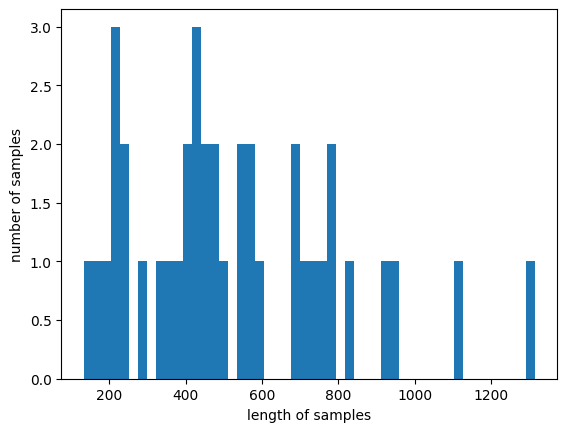

In [ ]:
# 길이 분포를 그래프로 확인해 봄

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'

print('최대 단어 수 :',max(len(l) for l in tokenized_data))
print('평균 단어 수 :',sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)

plt.xlabel('length of samples')

plt.ylabel('number of samples')

plt.show()


In [ ]:
# 정제한 내용으로 Word2Vec 모델 생성하기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않음)
# workers = 학습을 위한 프로세스(Thread) 수
# sg = 0은 CBOW, 1은 Skip-gram
#
# 20초 정도 소요


%time model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 1)


CPU times: user 631 ms, sys: 2.9 ms, total: 634 ms
Wall time: 380 ms


In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인

model.wv.vectors.shape


(883, 100)

In [ ]:
# 정확한 결과를 위해서 전체 데이터 처리 필요
#
# 결과 확인 하기 (1)


print(model.wv.most_similar("바이오"))


[('접목', 0.9946576356887817), ('관계자', 0.9944895505905151), ('석', 0.9944598078727722), ('조성', 0.9944392442703247), ('중요하다', 0.9944354891777039), ('반도체', 0.9943101406097412), ('북미', 0.9943072199821472), ('라는', 0.9942967891693115), ('유망', 0.9942707419395447), ('높다', 0.9941670298576355)]


In [ ]:
# 결과 확인 하기 (2)


print(model.wv.most_similar("의료"))



[('구글', 0.994028627872467), ('수강', 0.993632435798645), ('교육', 0.9934689998626709), ('클라우드', 0.993263840675354), ('재직', 0.9932296872138977), ('처헬', 0.9928774237632751), ('및', 0.9927841424942017), ('덱', 0.9926773309707642), ('협력', 0.992585301399231), ('셀트리온', 0.9923595786094666)]


In [ ]:
# 결과 확인 하기 (3)


print(model.wv.most_similar("실험"))

[('판단', 0.9980063438415527), ('바탕', 0.9979122877120972), ('연내', 0.9978963136672974), ('소재', 0.9978874921798706), ('질병', 0.9978652000427246), ('달성', 0.9978569746017456), ('문제', 0.9978566765785217), ('배출', 0.9978522062301636), ('에서도', 0.9978336691856384), ('시작', 0.9978312253952026)]
